<a href="https://colab.research.google.com/github/aekamban/Portfolio/blob/main/Business_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimizing Restaurant Demand Forecasting and Customer Experience: Data-Driven Insights for Business Growth



### Context

In today’s fast-paced world, the demand for online food delivery services is rapidly growing, particularly in urban areas like New York. As the number of restaurants increases, students and busy professionals rely heavily on food delivery platforms to meet their dining needs conveniently. FoodHub, a leading food aggregator, provides users with seamless access to multiple restaurants through a single smartphone application, offering a streamlined experience from order placement to doorstep delivery.

The FoodHub app facilitates the entire food delivery process by:

- Enabling customers to browse and place orders directly from their preferred restaurants.
- Assigning delivery personnel to manage pickups and ensure timely deliveries.
- Allowing customers to track their orders and provide feedback through the platform.
- Monetizing operations by collecting a fixed commission from partner restaurants for each successful transaction.


With an increasing number of partner restaurants and a growing user base, FoodHub aims to optimize its operations and improve customer experience by leveraging data-driven insights to understand demand patterns and restaurant performance.



### Objective

FoodHub has accumulated vast amounts of customer order data through its online portal and seeks to extract meaningful insights to enhance its operational efficiency and customer satisfaction. As a Data Scientist, my role is to analyze this dataset and provide actionable insights that address the following key business questions:

####1. Demand Analysis:

- Which restaurants experience the highest demand across different time periods?
- How does demand fluctuate based on location, cuisine type, and order timing?

####2. Customer Behavior Insights:

- What ordering patterns exist among different customer segments?
- How do factors such as delivery time, ratings, and repeat orders impact customer satisfaction?

####3. Operational Efficiency Improvements:

- What trends can help optimize delivery logistics and reduce waiting times?
- How can FoodHub improve order fulfillment rates and minimize cancellations?

####4. Revenue Optimization
- Which restaurant partnerships yield the highest profitability?
- What pricing strategies can maximize revenue while maintaining customer retention?

By applying SQL (PostgreSQL) for data extraction and transformation, Python for exploratory data analysis and modeling, and Tableau for interactive dashboarding, this analysis will help FoodHub make informed, data-driven decisions to boost business growth and customer satisfaction.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let's start by importing the required libraries

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Let's understand the structure of the data

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load the CSV file
file_path = '/content/drive/My Drive/foodhub_order.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

Mounted at /content/drive
   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  


In [ ]:
# Read the data
df = pd.read_csv(file_path)
# Return the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### How many rows and columns are present in the data?

In [ ]:
# Show number of rows and columns
df.shape
print(df.shape)

(1898, 9)


#### Observations: There are 1,898 rows and 9 columns


### What are the datatypes of the different columns in the dataset?

In [ ]:
# Print a concise summary of the DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


#### Observations: There are nine columns with 1,898 integer, float, or object values.


### Are there any missing values in the data?

In [ ]:
# Check for missing values
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: There are no missing values reported


### Let's check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Check for statistical summary of numerical data
print(df.describe())

           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  


#### Observations: The mean average food preparation time is 27.4 minutes with a range from a miniumum of 20.0 minutes to a maximum of 35.0 minutes


### How many orders are not rated?

In [ ]:
# Check for statistical summary of categorical data as well as numerical data
print(df.describe(include='all'))

            order_id    customer_id restaurant_name cuisine_type  \
count   1.898000e+03    1898.000000            1898         1898   
unique           NaN            NaN             178           14   
top              NaN            NaN     Shake Shack     American   
freq             NaN            NaN             219          584   
mean    1.477496e+06  171168.478398             NaN          NaN   
std     5.480497e+02  113698.139743             NaN          NaN   
min     1.476547e+06    1311.000000             NaN          NaN   
25%     1.477021e+06   77787.750000             NaN          NaN   
50%     1.477496e+06  128600.000000             NaN          NaN   
75%     1.477970e+06  270525.000000             NaN          NaN   
max     1.478444e+06  405334.000000             NaN          NaN   

        cost_of_the_order day_of_the_week     rating  food_preparation_time  \
count         1898.000000            1898       1898            1898.000000   
unique                NaN

#### Observations: 736 orders were not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### Let's explore all the variables and provide observations on their distributions.

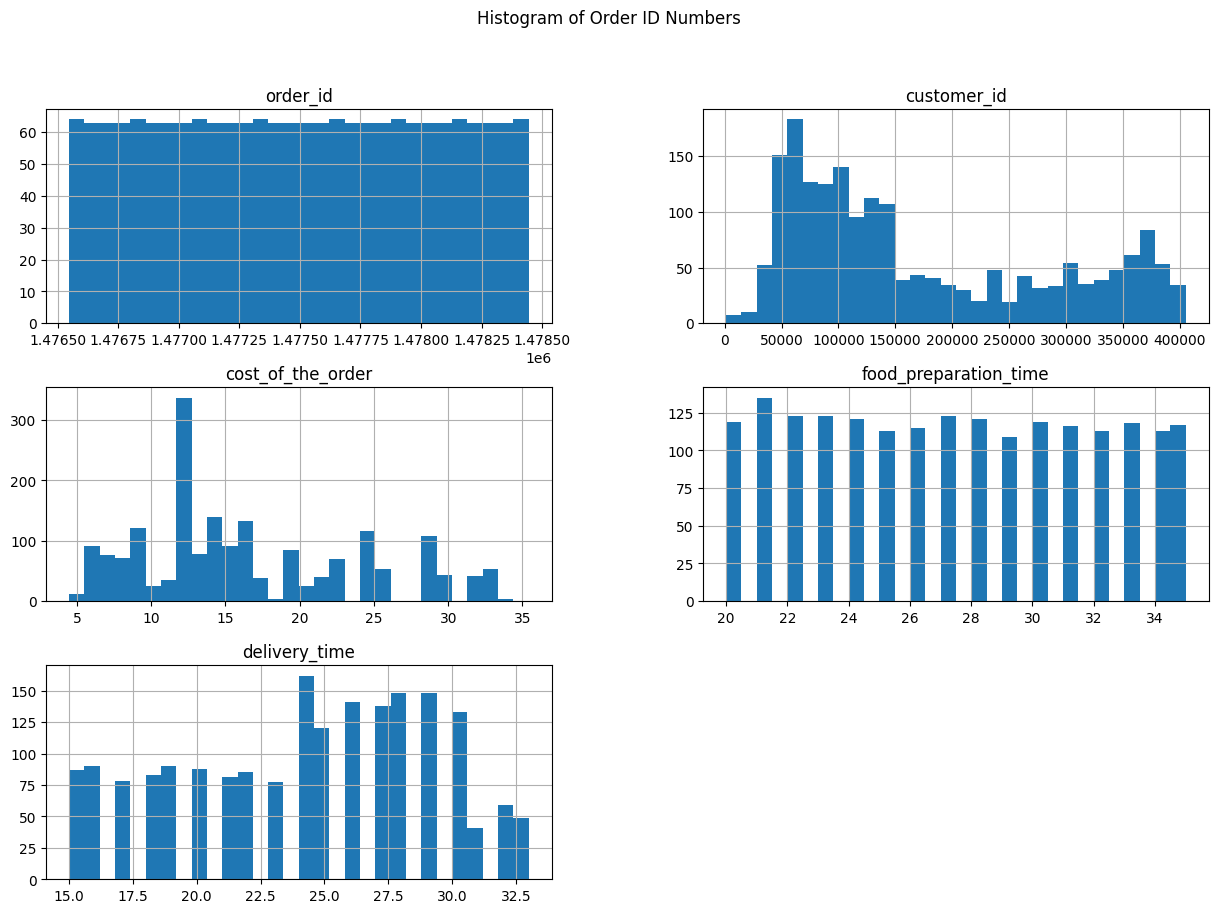

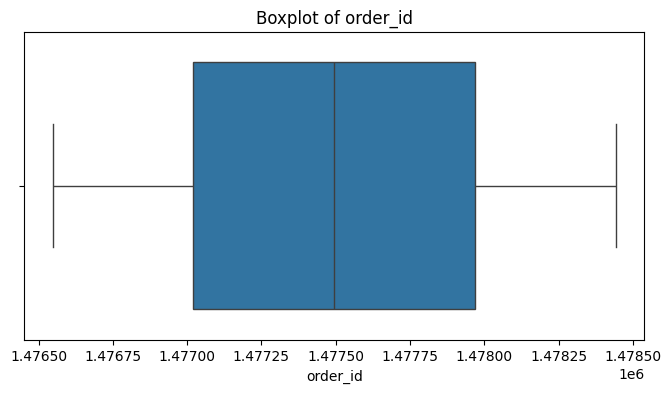

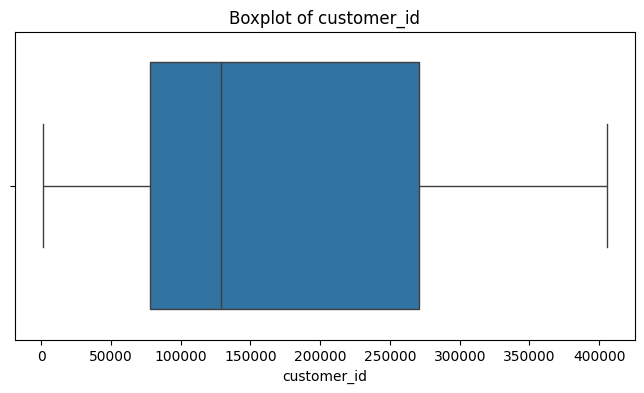

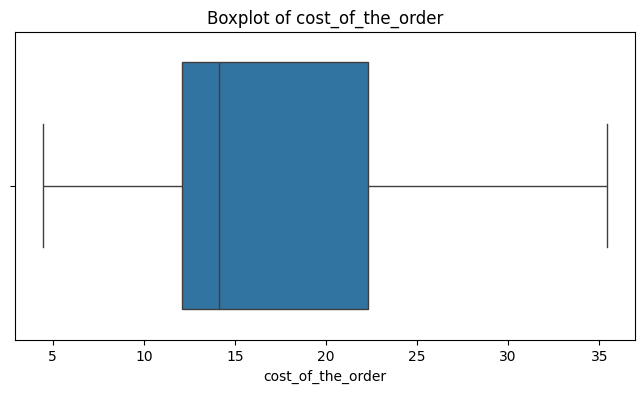

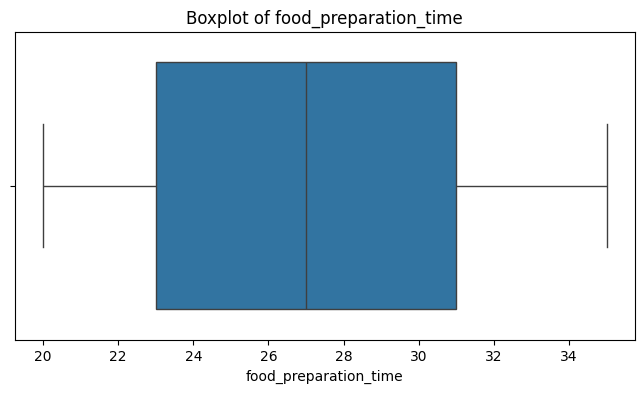

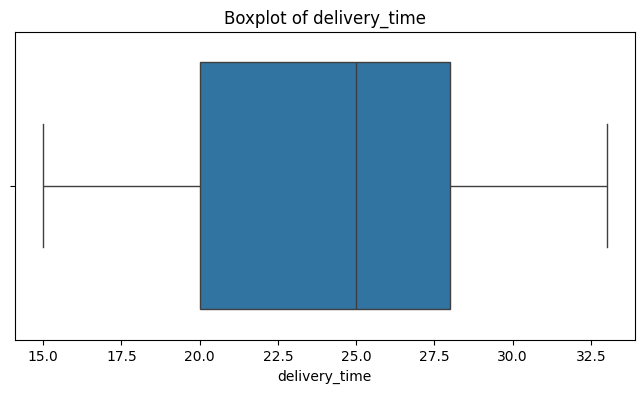

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


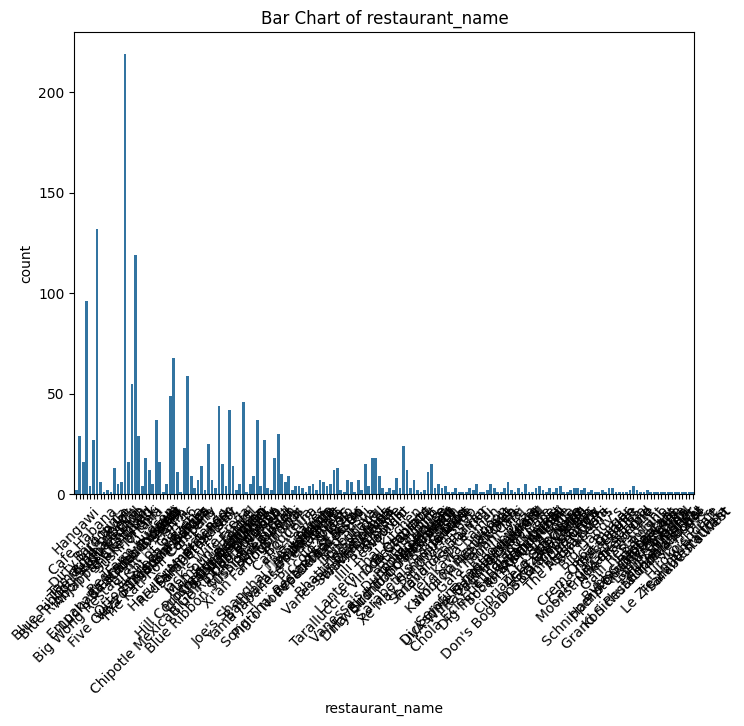

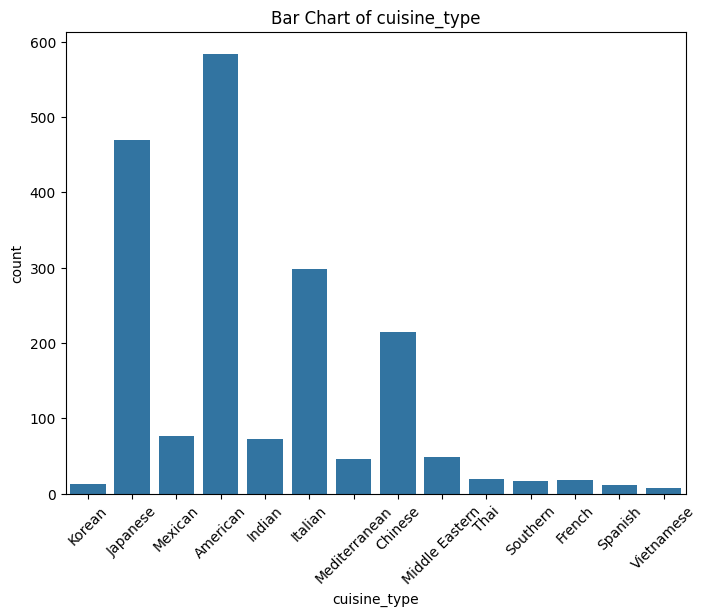

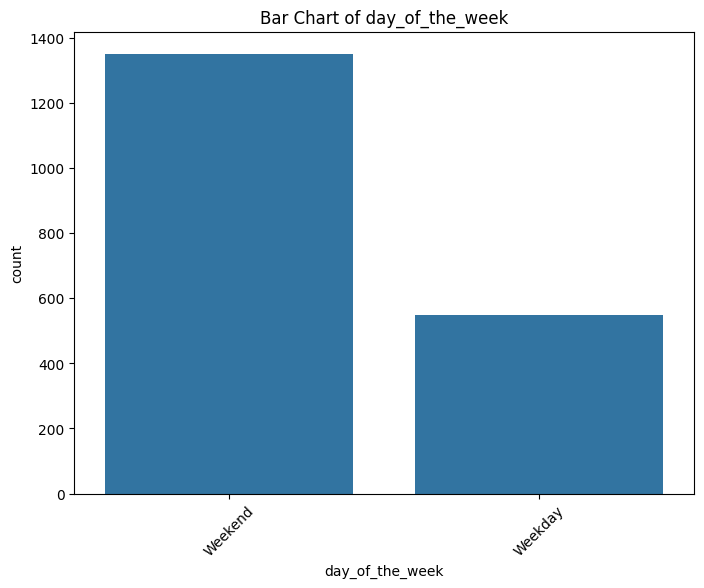

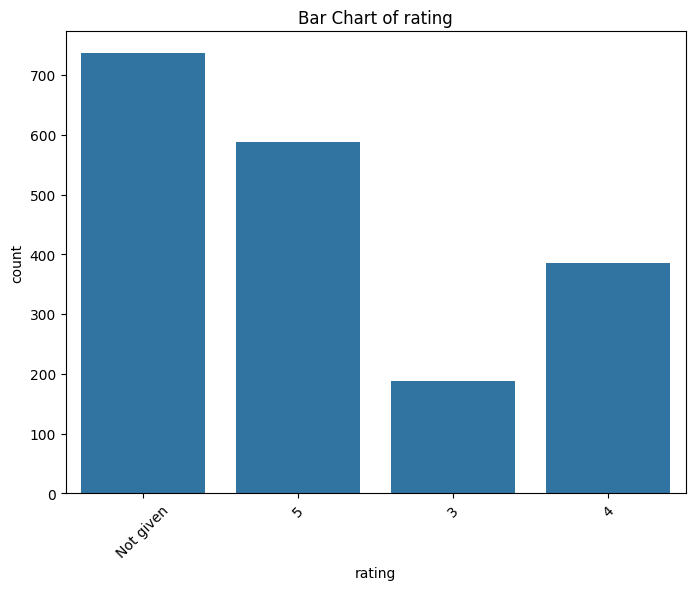

In [ ]:
# Plot histogram for each numerical variable
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram of Order ID Numbers")
plt.show()

# Plot box plots for each numerical variable
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

# Plot bar charts for each categorical variable
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title(f"Bar Chart of {column}")
    plt.xticks(rotation=45)
    plt.show()




Observations: Over 300 orders cost approximately $12, which is the mode cost per order. Over 150 orders took approximately 24 minutes to be delivered, which is the mode delivery time. The box plots for the customer ID's and cost of the orders are both skewed towards lower values, while the box plot for delivery time is skewed towards higher values. There are just over twice as many orders on the weekend compared to weekdays. Most orders that receieve a rating are given a 5 star rating.

###  Which are the top 5 restaurants in terms of the number of orders received?

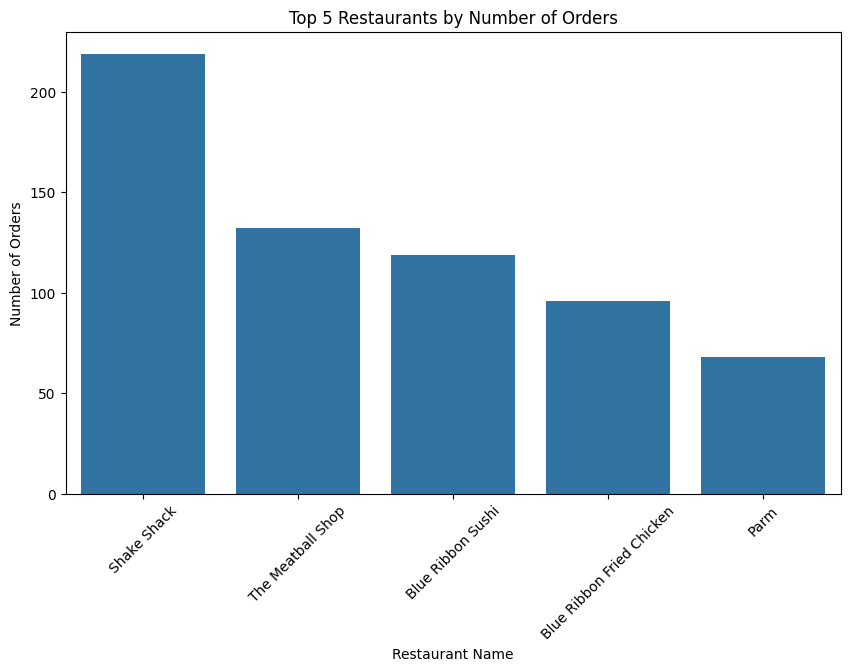

In [ ]:
# Plot bar chart for the five restaurants with the most orders

restaurant_order_counts = df['restaurant_name'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=restaurant_order_counts.index, y=restaurant_order_counts.values)
plt.xlabel("Restaurant Name")
plt.ylabel("Number of Orders")
plt.title("Top 5 Restaurants by Number of Orders")
plt.xticks(rotation=45)
plt.show()

#### Observations: The top five restaurants in terms of numbers of orders are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm


### Which is the most popular cuisine on weekends?

In [ ]:
# Filter days of the week to identify weekends
filtered_data = df[df['day_of_the_week']=='Weekend']

# Count the occurrences of each cuisine type on weekends
cuisine_counts = filtered_data.groupby('cuisine_type').size().reset_index(name='count')

# Get the top cuisine type on weekends
most_popular_cuisine = cuisine_counts.sort_values(by='count',ascending=False).iloc[0]['cuisine_type']
print('The most popular cuisine on weekends is:',most_popular_cuisine)

The most popular cuisine on weekends is: American


#### Observations: American is the most popular cuisine on weekends


### What percentage of the orders cost more than 20 dollars?

In [ ]:
# Filter orders greater than $20
orders_above_20 = df[df['cost_of_the_order'] > 20]

# Calculate the percentage
percentage = (len(orders_above_20) / len(df)) * 100

# Output the result
print(f"The percentage of orders costing more than $20 is {percentage:.2f}%")

The percentage of orders costing more than $20 is 29.24%


#### Observations: The percentage of orders costing more than $20 is 29.24 %


###  What is the mean order delivery time?

In [ ]:
# Calculate the mean delivery time
mean_delivery_time = df['delivery_time'].mean()

# Output the result
print(f"The mean delivery time is {mean_delivery_time:.2f} minutes")

The mean delivery time is 24.16 minutes


#### Observations: The mean delivery time is 24.16 minutes


###The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
# Group by customer_id and count the number of orders per customer
customer_order_counts = df.groupby('customer_id').size().reset_index(name='order_count')

# Sort by order_count in descending order and select the top 3
top_customers = customer_order_counts.sort_values(by='order_count', ascending=False).head(3)

# Output the result
print("Top 3 most frequent customers:")
print(top_customers)

Top 3 most frequent customers:
     customer_id  order_count
116        52832           13
84         47440           10
333        83287            9


#### Observations: The company should give 20 % discount vouchers to customer 52832 who placed 13 orders, customer 47440 who placed 10 orders, and customer 83287 who placed 9 orders.


### Multivariate Analysis

###  Let's perform a multivariate analysis to explore relationships between the important variables in the dataset.


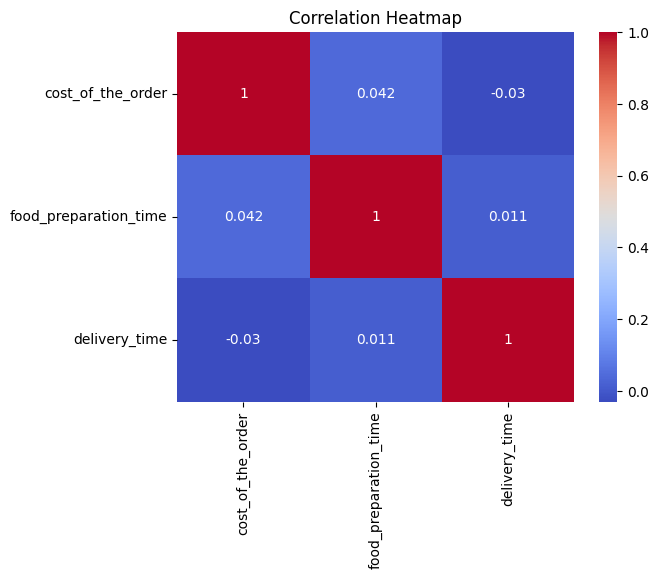

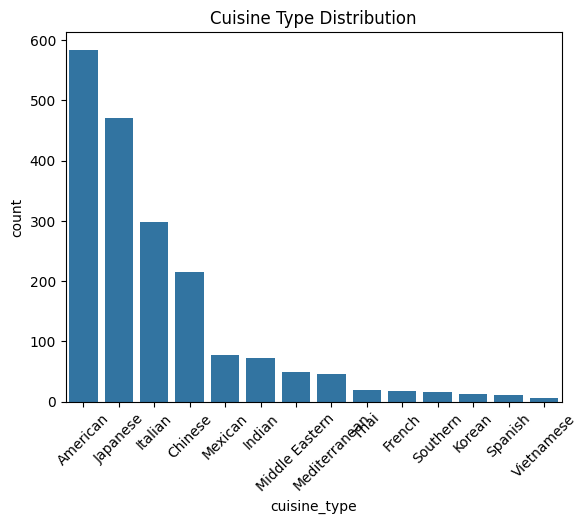

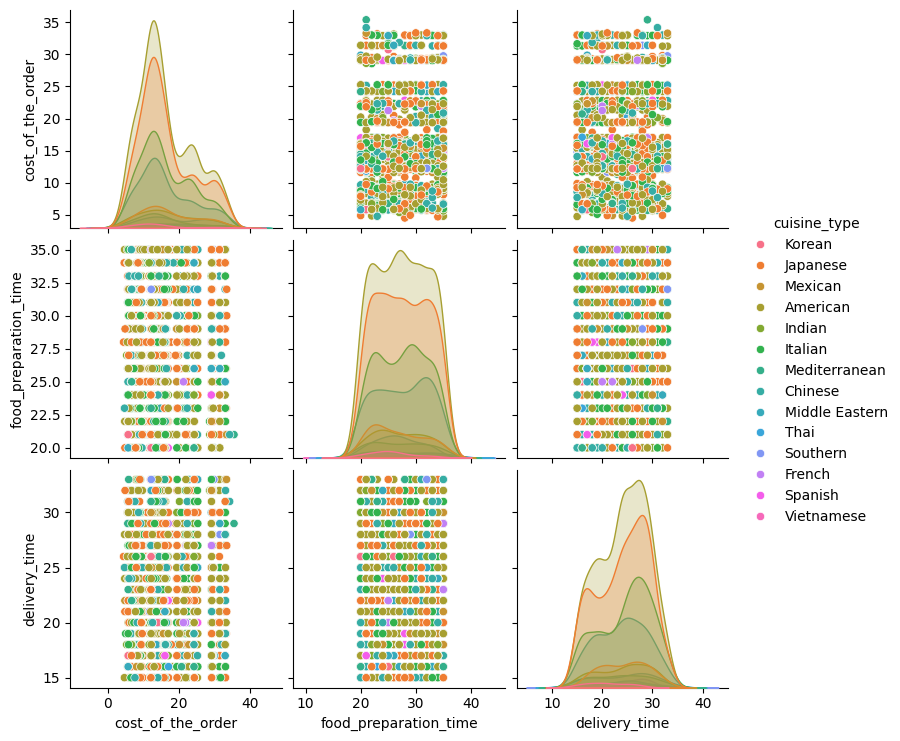

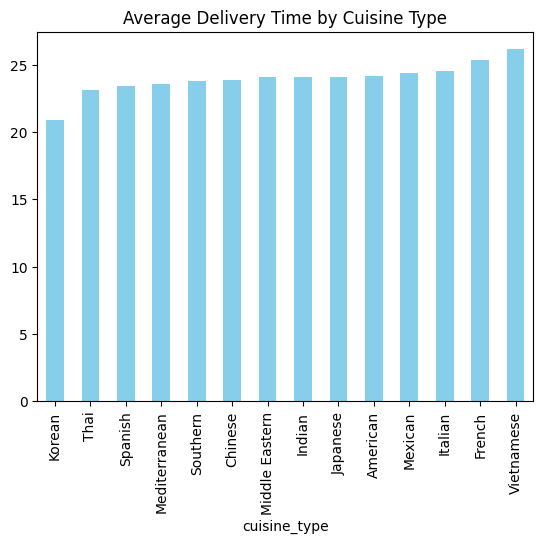

                            OLS Regression Results                            
Dep. Variable:          delivery_time   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     48.30
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          6.16e-128
Time:                        19:03:44   Log-Likelihood:                -5410.3
No. Observations:                1898   AIC:                         1.085e+04
Df Residuals:                    1881   BIC:                         1.095e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Correlation heatmap
corr_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Count plot for cuisine type
sns.countplot(x='cuisine_type', data=df, order=df['cuisine_type'].value_counts().index)
plt.title('Cuisine Type Distribution')
plt.xticks(rotation=45)
plt.show()

# Pair plot for cuisine type
sns.pairplot(df, hue='cuisine_type', vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time'])
plt.show()

# Bar plot for average delivery time by cuisine type
grouped = df.groupby('cuisine_type')['delivery_time'].mean().sort_values()
grouped.plot(kind='bar', title='Average Delivery Time by Cuisine Type', color='skyblue')
plt.show()

# Regression analysis
import statsmodels.api as sm

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['cuisine_type', 'day_of_the_week', 'rating'], drop_first=True)

# Independent variables
X = df_encoded[['cost_of_the_order', 'food_preparation_time'] + [col for col in df_encoded.columns if 'cuisine_type' in col or 'day_of_the_week' in col]]

# Dependent variable
y = df_encoded['delivery_time']

#Convert X and y to numeric data types
X=X.astype(float)
y=y.astype(float)

# Add constant for regression
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

Observations: About 29.1 % of the variability in delivery time is explained by the model with some predictors not significantly contributing to explaining delivery time. The model is statistically significant, meaning at least one of the predictors contributes to explaining the variability in delivery time.

More specifically, the cost of the order and the food preparation time have a statistically insignificant effect on delivery time. Korean cuisine is associated with delivery times that are 2.46 minutes shorter, compared to the baseline cuisine. This is statistically significant at the 5 % level. All other cuisines do not have a statistically significant effect on delivery time. Finally, deliveries on the weekend are, on average, 5.86 minutes faster than on weekdays. This is highly significant, indicating a strong and reliable effect.

### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Let's find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# Replace 'Not Given' with NaN and convert ratings to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by restaurant_name to calculate rating count and average rating
restaurant_stats = df.groupby('restaurant_name').agg(
    rating_count=('rating', 'count'),
    avg_rating=('rating', 'mean')
).reset_index()

# Filter restaurants with more than 50 ratings and average rating > 4
filtered_restaurants = restaurant_stats[
    (restaurant_stats['rating_count'] > 50) & (restaurant_stats['avg_rating'] > 4)
]

# Display the result
print(filtered_restaurants)

               restaurant_name  rating_count  avg_rating
20   Blue Ribbon Fried Chicken            64    4.328125
21           Blue Ribbon Sushi            73    4.219178
136                Shake Shack           133    4.278195
153          The Meatball Shop            84    4.511905


#### Observations: The restaurants eligible for the company's promotional offer are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop.


### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Let's find the net revenue generated by the company across all orders.

In [ ]:
# Calculate revenue for each order
df["company_fee"] = df["cost_of_the_order"].apply(
    lambda x: 0.25 * x if x > 20 else (0.15 * x if x > 5 else 0)
)

# Calculate total revenue
net_revenue = df["company_fee"].sum()

# Display results
print("Net revenue generated by the company: $", round(net_revenue, 2))

Net revenue generated by the company: $ 6166.3


#### Observations: The net revenue generated by the company across all orders is $6,166.30.


### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed?

In [ ]:
# Calculate the total time for each order
df["total_time"] = df["food_preparation_time"] + df["delivery_time"]

# Calculate the percentage of orders taking more than 60 minutes
total_orders = len(df)
orders_over_60 = len(df[df["total_time"] > 60])
percentage_over_60 = (orders_over_60 / total_orders) * 100

# Display results
print(f"Percentage of orders taking more than 60 minutes: {percentage_over_60:.2f}%")

Percentage of orders taking more than 60 minutes: 10.54%




#### Observations: 10.54 % of orders take more than 60 minutes to get delivered from the time the order was placed.


### The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Calculate mean delivery time for weekdays and weekends
mean_delivery_time = df.groupby("day_of_the_week")["delivery_time"].mean()

# Display results
print("Mean delivery time (minutes):")
print(mean_delivery_time)

Mean delivery time (minutes):
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations: The mean delivery time is longer on the weekdays (approximately 28 minutes) and shorter on weekends (approximately 22 minutes).


### Conclusion and Recommendations

### Conclusions:
1. Preparation and Delivery Times:

* The average food preparation time is 27.4 minutes, with a narrow range (20–35 minutes), indicating consistent kitchen efficiency.
* Delivery times are shorter on weekends (22 minutes) compared to weekdays (28 minutes), potentially due to lower traffic congestion or operational differences.
* About 10.54% of orders exceed 60 minutes for delivery, which could impact customer satisfaction.


2. Customer Ratings and Engagement:

* A significant proportion of orders (736) were not rated, indicating a lack of customer feedback.
* Among rated orders, most received 5-star ratings, suggesting satisfaction with the service when feedback is provided.


3. Cuisine and Restaurant Popularity:

* American cuisine dominates on weekends, aligning with the popularity of restaurants like Shake Shack.
* Korean cuisine is associated with significantly shorter delivery times (2.46 minutes), making it a standout for efficiency.


4. Order Costs and Revenue:

* The mode cost of 12 dollars per order suggests a price sweet spot for the majority of customers.
* 29.24% of orders cost more than 20 dollars, showing potential for high-revenue segments.
* The net revenue of 6,166.30 dollars reflects solid performance but reveals room for growth in monetization strategies.


5. Customer Loyalty:

* The three most frequent customers have been identified for reward with 20% discount vouchers, supporting customer retention initiatives.


6. Delivery Time Model:

* The regression model explains 29.1% of variability in delivery time, with weekend delivery times being 5.86 minutes faster than weekdays.
* Predictors like cost of the order and food preparation time do not significantly affect delivery time, suggesting operational consistency.


### Recommendations:

1. Improve Delivery Time Efficiency:

* Analyze the 10.54% of orders taking more than 60 minutes and identify bottlenecks (e.g., specific locations, peak times).
* Emulate operational practices for Korean cuisine and weekends to improve overall delivery efficiency.

2. Increase Feedback Collection:

* Implement strategies to encourage more customer ratings, such as post-delivery surveys or rewards for completing feedback.
* Use ratings to identify areas for improvement in service and food quality.

3. Promote High-Performing Restaurants and Cuisines:

* Highlight restaurants like Shake Shack and The Meatball Shop in marketing campaigns, especially on weekends.
* Leverage the efficiency of Korean cuisine delivery to attract more customers to these options.

4. Refine Pricing and Promotions:

* Target customers in the high-revenue segment (orders > $20) with loyalty programs or promotional offers.
* Evaluate whether increasing the average cost per order (e.g., bundling meals or upselling sides) can raise overall revenue.

5. Optimize Weekend Operations:

* Explore replicating weekend delivery efficiencies during weekdays through staffing adjustments or route optimizations.
* Increase marketing efforts for American cuisine and popular restaurants on weekends to maximize revenue potential.

6. Customer Loyalty Programs:

* Extend the 20% discount voucher initiative to customers placing frequent high-value orders to retain top contributors to revenue.

7. Enhance Predictive Modeling:

* Revisit the regression model and add more variables (e.g., delivery distance, time of day) to improve its predictive power.
* Focus on optimizing significant predictors like weekday/weekend differences to streamline delivery operations.


---

In [2]:
# Convert file to html
!pip install nbconvert
!jupyter nbconvert --to html 'Business Data Analysis.ipynb'

[NbConvertApp] WARNING | pattern 'Business Data Analysis.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--